## Importing libraries

In [20]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
import plotly.express as px
from mpl_toolkits.mplot3d import Axes3D

from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPool2D
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dropout
from tensorflow.keras.utils import plot_model
from keras.models import load_model

from tensorflow import keras

# Gathering Dataset

### Loading the Data

In [2]:
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

print("shape of x_train: ", x_train.shape)
print("shape of x_test: ", x_test.shape)
# print(x_train[1])
print(x_train.shape[0])

shape of x_train:  (60000, 28, 28)
shape of x_test:  (10000, 28, 28)
60000


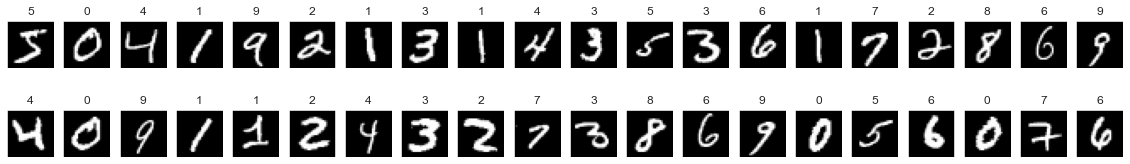

In [3]:
fig = plt.figure(figsize=(20,3))
for i in range(40):
    ax = fig.add_subplot(2, 20, i+1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(x_train[i]), cmap='gray')
    ax.set_title(y_train[i])

### Checking the shape of input data

In [4]:
img_shape = x_train.shape[1:]
print(img_shape)

(28, 28)


### Build the ANN model

In [5]:
model_ann = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation= 'relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10, activation='softmax')
])

### Compile and train the model

In [6]:
model_ann.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [7]:
r = model_ann.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=20)

Epoch 1/20
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2974 - accuracy: 0.9135 - val_loss: 0.1438 - val_accuracy: 0.9577
Epoch 2/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1423 - accuracy: 0.9564 - val_loss: 0.0963 - val_accuracy: 0.9713
Epoch 3/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1045 - accuracy: 0.9679 - val_loss: 0.0826 - val_accuracy: 0.9739
Epoch 4/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0884 - accuracy: 0.9724 - val_loss: 0.0752 - val_accuracy: 0.9771
Epoch 5/20
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0729 - accuracy: 0.9769 - val_loss: 0.0661 - val_accuracy: 0.9792
Epoch 6/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0658 - accuracy: 0.9789 - val_loss: 0.0742 - val_accuracy: 0.9765
Epoch 7/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0571 - accuracy: 0.9816 - val_loss: 0.0698 - val_accuracy:

Plotting Loss per Iteration

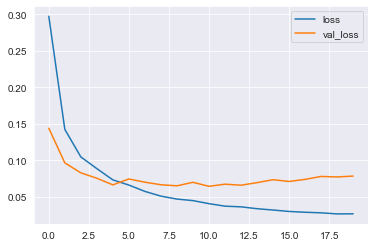

In [8]:
plt.plot(r.history['loss'], label= 'loss')
plt.plot(r.history['val_loss'], label= 'val_loss')
plt.legend()
plt.show()

Plotting Accuracy per Iteration

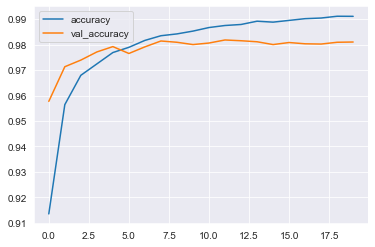

In [9]:
plt.plot(r.history['accuracy'], label= 'accuracy')
plt.plot(r.history['val_accuracy'], label= 'val_accuracy')
plt.legend()
plt.show()

In [10]:
print(model_ann.evaluate(x_test, y_test))

313/313 [==============================] - 0s 1ms/step - loss: 0.0782 - accuracy: 0.9810
[0.07817792892456055, 0.9810000061988831]


In [12]:
loss, accuracy = model_ann.evaluate(x_test, y_test, verbose=1)
print(accuracy*100)

313/313 [==============================] - 1s 2ms/step - loss: 0.0782 - accuracy: 0.9810
98.1000006198883


## Building the CNN model

In [13]:
x_train_cnn = x_train.reshape((x_train.shape[0], x_train.shape[1], x_train.shape[2], 1))
x_test_cnn = x_test.reshape((x_test.shape[0], x_test.shape[1], x_test.shape[2], 1))

# y_train_cnn = y_train.reshape((y_train.shape[0], y_train.shape[1], y_train.shape[2], 1))
# y_test_cnn = y_test.reshape((y_test.shape[0], y_test.shape[1], y_test.shape[2], 1))

cnn_shape = x_train_cnn.shape[1:]
print(cnn_shape)

(28, 28, 1)


In [14]:
model_cnn = Sequential()
model_cnn.add(Conv2D(32, (3,3), activation='relu', input_shape= cnn_shape))
model_cnn.add(MaxPool2D((2,2)))
model_cnn.add(Conv2D(48, (3,3), activation='relu'))
model_cnn.add(MaxPool2D((2,2)))
model_cnn.add(Dropout(0.5))
model_cnn.add(Flatten())
model_cnn.add(Dense(500, activation='relu'))
model_cnn.add(Dense(10, activation='softmax'))

In [15]:
model_cnn.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 48)        13872     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 48)         0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 5, 5, 48)          0         
                                                                 
 flatten_1 (Flatten)         (None, 1200)             

In [16]:
plot_model(model_cnn, 'model_cnn.jpg', show_shapes=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model/model_to_dot to work.


In [17]:
model_cnn.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

r2 = model_cnn.fit(x_train_cnn, y_train, epochs=10, batch_size=128, verbose=1, validation_split=0.1)

Epoch 1/10
422/422 [==============================] - 16s 37ms/step - loss: 0.2406 - accuracy: 0.9267 - val_loss: 0.0632 - val_accuracy: 0.9830
Epoch 2/10
422/422 [==============================] - 15s 36ms/step - loss: 0.0833 - accuracy: 0.9735 - val_loss: 0.0404 - val_accuracy: 0.9892
Epoch 3/10
422/422 [==============================] - 15s 36ms/step - loss: 0.0581 - accuracy: 0.9820 - val_loss: 0.0360 - val_accuracy: 0.9893
Epoch 4/10
422/422 [==============================] - 16s 37ms/step - loss: 0.0488 - accuracy: 0.9848 - val_loss: 0.0291 - val_accuracy: 0.9922
Epoch 5/10
422/422 [==============================] - 16s 38ms/step - loss: 0.0409 - accuracy: 0.9864 - val_loss: 0.0301 - val_accuracy: 0.9913
Epoch 6/10
422/422 [==============================] - 16s 38ms/step - loss: 0.0351 - accuracy: 0.9885 - val_loss: 0.0283 - val_accuracy: 0.9920
Epoch 7/10
422/422 [==============================] - 16s 38ms/step - loss: 0.0313 - accuracy: 0.9895 - val_loss: 0.0269 - val_accuracy:

In [18]:
loss1, accuracy2 = model_cnn.evaluate(x_test_cnn, y_test, verbose=1)
print(accuracy2*100)

313/313 [==============================] - 2s 6ms/step - loss: 0.0234 - accuracy: 0.9929
99.2900013923645


In [21]:
scores = [('ANN', accuracy), ('CNN', accuracy2)]
comp = pd.DataFrame(data=scores, columns=['Model', 'Score'])
comp

,Model,Score
0,ANN,0.9810
1,CNN,0.9929


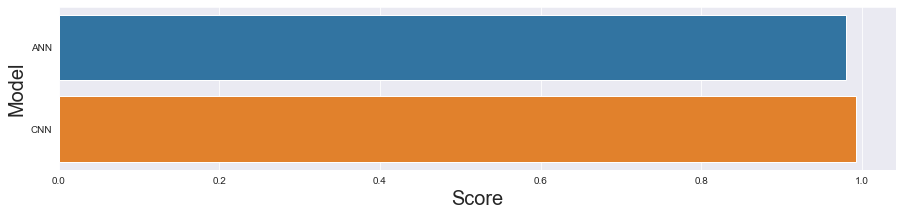

In [28]:
f, axe = plt.subplots(1,1, figsize=(15,3))
sns.barplot(y='Model', x='Score', data=comp, ax = axe)
axe.set_ylabel('Model', size=20)
axe.set_xlabel('Score', size=20)

plt.show()